___
# Atividade: Combinação linear de variáveis aleatórias e propriedades de esperança e variância
___

## Aula 16 - Atividade

<div id="indice"></div>

## Índice

- [Motivação teórica](#motivacao)
    - [Exercício 1](#ex1)
- [O que significa fazer $X+Y$?](#significa)
- [Programando valores para representar $X$, $Y$ e $X+Y$](#simulacao)
    - [Simulação com uso de *loop*](#simulacao1)
        - [Exercício 2](#ex2)
    - [Melhorando a performance na simulação](#simulacao2)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
- [Contrastando com previsão teórica](#teoria)       
- [Contrastando com previsão teórica](#propriedades)       
    - [Exercício 5](#ex5)
 
- [Lista de comandos utilizados neste notebook](#comandos)
___

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

___
<div id="motivacao"></div>

## Motivação teórica

A seguir, considere duas variáveis aleatórias $X$ e $Y$, ambas contínuas, cujo objetivo seja somá-las, ou seja, obter $X+Y$!

Vamos criar um experimento considerando as seguintes distribuições e parâmetros para $X$ e $Y$, respectivamente:

 $X \sim$ Uniforme$(4,7)$, ou seja, $a=4$ e $b=7$

e 

 $Y \sim$ Exponencial$(1/3)$, ou seja, $\lambda=1/3$ e $\mu=3$.

<div id="ex1"></div>

### EXERCÍCIO 1

Inicialmente, construa um gráfico de ambas as distribuições univariadamente. Veja **Aula12** caso tenha dúvidas com essas duas distribuições.

In [19]:
# ESCREVA SEU CÓDIGO AQUI
mu = 3
a = 4
b = 7

In [20]:
# Vamos criar uma faixa de valores para eixo x, válida para ambas as distribuições
eixo_x = np.linspace(-1, 15, 300)

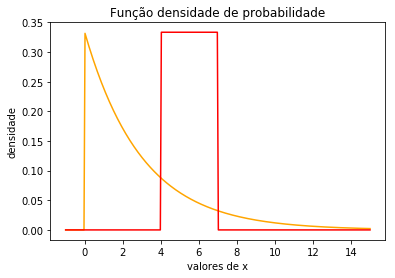

In [21]:
fx_expon = stats.expon.pdf(eixo_x, scale = mu)
fx_uniform = stats.uniform.pdf(eixo_x, loc = a, scale = b - a)

plt.plot(eixo_x, fx_expon, color='orange')
plt.plot(eixo_x, fx_uniform, color='red')
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Função densidade de probabilidade')
plt.show()

___
<div id="significa"></div>

## O que significa fazer $X + Y$ ?

Considere, **por exemplo**, que um produto passe por duas etapas na linha de produção e o tempo em cada etapa seja mensurados. Assim, assuma que:

  * $X$ represente o tempo, em minutos, que um produto demora para passar pela etapa $1$; e
  * $Y$ represente o tempo, em minutos, que o mesmo produto demora para passar pela etapa $2$ na linha de produção.
  
Assim, $W+X+Y$ deverá representar o tempo total que um produto demora para ficar pronto se esse precisa apenas dessas duas etapas na linha de produção.

O que vamos entender agora é como podemos analisar o **valor esperado** e a **variância** de $W$ a partir de dados e depois considerando propriedades de esperança e variância.

___
<div id="simulacao"></div>

## Programando valores para representar $X$, $Y$ e $X+Y$

Para estudarmos como ficaria o valor esperado e a variância de $W=X+Y$ a partir de dados, devemos simular alguns valores hipotéticos para representar $X$ conforme a uniforme e $Y$ conforme a exponencial mencionada acima. 

Para tanto, no `scipy.stats`, a função que gera uma amostra de valores conforme uma distribuição qualquer é a função `rvs()` (de *random variable sample*). No nosso exemplo, vamos utilizar `uniform.rvs()` ou `expon.rvs` com os valores dos parâmetros adequadamente aos citados anteriormente.

Assim, faremos:
  * Simular $n$ valores para construir uma amostra de $X$ utilizando a distribuição uniforme
  * Simular $n$ valores para construir uma amostra de $Y$ utilizando a distribuição exponencial
  * A cada linha, somar os valores de $x$ e de $y$ para construir a coluna $w$, já que $W = X + Y$

<div id="simulacao1"></div>

### Simulação com uso de *loop*:

Simulação mais "lenta" por fazer uso de `for`. Aqui, será simulado um valor por vez para $x$ e para $y$, calculado a soma e aguardado em $w$.

In [22]:
n = 5000

In [23]:
x_all = []
y_all = []
w_all = []

for i in range(n):
    x = uniform.rvs(loc=a, scale=b-a)
    y = expon.rvs(scale=mu)
    w = x+y
    
    # Guarda os n valores em lista
    x_all.append(x)
    y_all.append(y)
    w_all.append(w)

Dependendo das distribuições somadas, a nova distribuição resultante pode apresentar um outro formato. Ou seja, somar uma uniforme e uma exponencial, pode resultar numa terceira distribuição teórica que pode ou não ser facilmente conhecida na literatura estatística. 

Vamos visualizar o histograma dos valores de $x$, de $y$ e de $w$, esse último que deve indicar o formato da distribuição resultante.

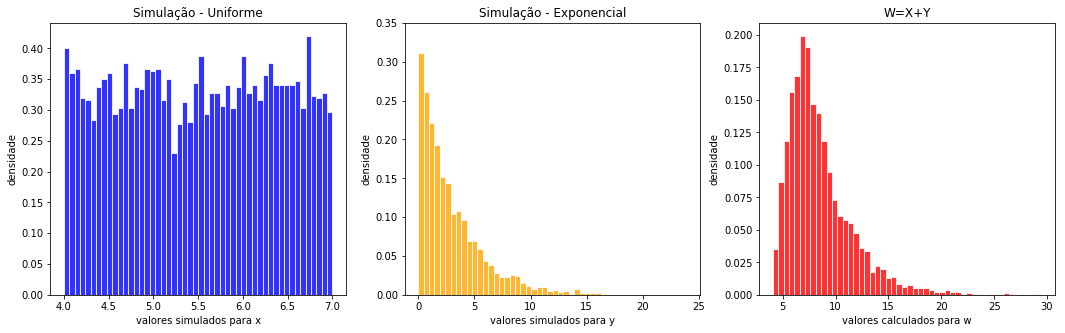

In [24]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.hist(x_all, bins=50, density=True,
         color='blue', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores simulados para x')
plt.title('Simulação - Uniforme')
#plt.ylim(0,0.35)

plt.subplot(132)
plt.hist(y_all, bins=50, density=True,
         color='orange', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores simulados para y')
plt.title('Simulação - Exponencial')
plt.ylim(0,0.35)

plt.subplot(133)
plt.hist(w_all, bins=50, density=True,
         color='red', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores calculados para w')
plt.title('W=X+Y')

plt.show()


**Pontos importantes:** 

Implementar $X+Y$ é somar os valores de $X$ com os valores de $Y$, linha a linha, e obter uma nova distribuição, cuja área também valerá $1$!!!

<div id="ex2"></div>

### EXERCÍCIO 2

Considerando os valores de `x_all`, `y_all` e `w_all`, calcule a média e variância de cada variável.

In [59]:
# ESCREVA SEU CÓDIGO AQUI
esperanca_x = 0
for i in range(len(x_all)):
    esperanca_x += i*x_all[i]

esperanca_x /= len(x_all) 

var_x = 0
for i in range(len(x_all)):
    var_x += (i-esperanca_x)**2*x_all[i]
    
esperanca_y = 0
for i in range(len(y_all)):
    esperanca_y += i*y_all[i]
    
esperanca_y /= len(y_all)

var_y = 0
for i in range(len(y_all)):
    var_y += (i-esperanca_y)**2*y_all[i]
    
esperanca_w = 0
for i in range(len(w_all)):
    esperanca_w += i*w_all[i]
    
esperanca_w /= len(w_all)

var_w = 0
for i in range(len(w_all)):
    var_w += (i-esperanca_w)**2*w_all[i]
    
print("Esperança de x: {}".format(esperanca_x))
print("Esperança de y: {}".format(esperanca_y))
print("Esperança de w: {}".format(esperanca_w))
print("")
print("Variância de x: {}".format(var_x))
print("Variância de y: {}".format(var_y))
print("Variância de w: {}".format(var_w))

Esperança de x: 13762.869585007247
Esperança de y: 7562.6019505179975
Esperança de w: 21325.4715355253

Variância de x: 3543492417275.4517
Variância de y: 415864588599.2165
Variância de w: 15166705338620.777


In [61]:
np.mean(y_all)

3.0145016237231452

___

<div id="simulacao2"></div>

### Melhorando a performance na simulação:

Agora, ao invés de fazer um *loop* para gerar $n$ amostras em Python, podemos pedir à função `rvs()` que realize $n$ sorteios diretamente utilizando o **argumento** `size = n`. 

In [41]:
x_All = uniform.rvs(loc=a, scale=b-a, size=n)
y_All = expon.rvs(scale=mu, size=n)

# note que estamos somando elemento a elemento de x_All e y_All e obtendo um novo array
w_All = x_All + y_All 

Observe que os resultados gerados aqui não se alteram, de maneira geral, mas o desempenho é melhor (mais rápido).

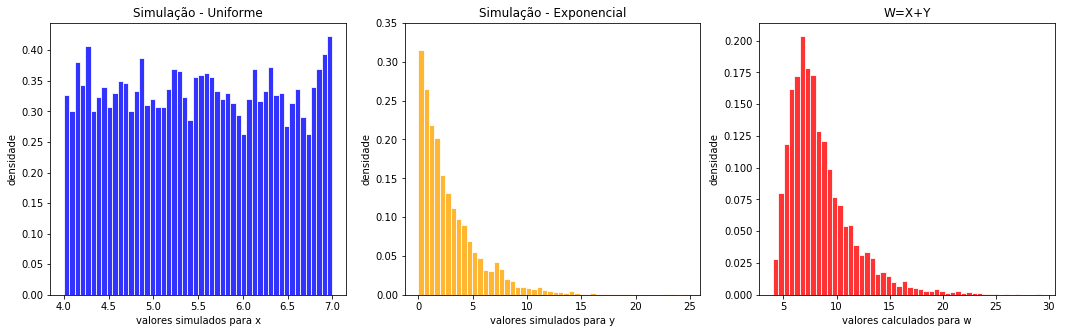

In [42]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.hist(x_All, bins=50, density=True,
         color='blue', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores simulados para x')
plt.title('Simulação - Uniforme')
#plt.ylim(0,0.35)

plt.subplot(132)
plt.hist(y_All, bins=50, density=True,
         color='orange', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores simulados para y')
plt.title('Simulação - Exponencial')
plt.ylim(0,0.35)

plt.subplot(133)
plt.hist(w_All, bins=50, density=True,
         color='red', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores calculados para w')
plt.title('W=X+Y')

plt.show()

<div id="ex3"></div>

### EXERCÍCIO 3

Considerando os valores de `x_All`, `y_All` e `w_All`, calcule a média e variância de cada variável. Ainda, calcule covariância e correlação entre `x_All` e `y_All`.

In [52]:
# ESCREVA SEU CÓDIGO AQUI
from math import sqrt

esperanca_x = 0
for i in range(len(x_All)):
    esperanca_x += i*x_All[i]

var_x = 0
for i in range(len(x_All)):
    var_x += (i-esperanca_x)**2*x_All[i]
    
esperanca_y = 0
for i in range(len(y_All)):
    esperanca_y += i*y_All[i]

var_y = 0
for i in range(len(y_All)):
    var_y += (i-esperanca_y)**2*y_All[i]
    
covarianciaXY = 0
for i in range(len(x_All)):
    covarianciaXY += (x_All[i]-esperanca_x)*(y_All[i]-esperanca_y)/len(x_All) 
    
correlacaoXY = covarianciaXY/(sqrt(var_x)*sqrt(var_y))
    
esperanca_w = 0
for i in range(len(w_All)):
    esperanca_w += i*w_All[i]

var_w = 0
for i in range(len(w_all)):
    var_w += (i-esperanca_w)**2*w_All[i]
    
print("Esperança de x: {}".format(esperanca_x))
print("Esperança de y: {}".format(esperanca_y))
print("Esperança de w: {}".format(esperanca_w))
print("")
print("Variância de x: {}".format(var_x))
print("Variância de y: {}".format(var_y))
print("Variância de w: {}".format(var_w))
print("")
print("Covariância entre X e Y: {}".format(covarianciaXY))
print("Correlação entre X e Y: {}".format(correlacaoXY))

Esperança de x: 68636498.30982143
Esperança de y: 36286510.17885154
Esperança de w: 104923008.48867317

Variância de x: 1.2952987750802899e+20
Variância de y: 1.9253410979567948e+19
Variância de w: 4.636893024507751e+20

Covariância entre X e Y: 2490578594250413.0
Correlação entre X e Y: 4.987253377194091e-05


<div id="ex4"></div>

### EXERCÍCIO 4

Os valores de `x_All`, `y_All` e `w_All` foram colocados em um *dataframe* chamando `df`.

Considerando as variáveis `X`, `Y` e `W` desse *dataframe*, calcule a média e variância de cada variável. Ainda, calcule covariância e correlação entre `X` e `Y`.

Faça todas as contas utilizando comando do *pandas*.


In [53]:
df = pd.DataFrame()
df['X'] = x_All
df['Y'] = y_All
df['W'] = w_All
df.head()

,X,Y,W
0,4.652239,0.973421,5.625660
1,5.481498,0.569892,6.051390
2,6.320514,8.187761,14.508275
3,5.258405,5.569414,10.827819
4,6.374912,1.083900,7.458812


In [56]:
# ESCREVA SEU CÓDIGO AQUI
esperanca_x_pd = df['X'].mean()
esperanca_y_pd = df['Y'].mean()
esperanca_W_pd = df['W'].mean()

var_x_pd = (df['X'].std()**2)
var_y_pd = (df['Y'].std()**2)
var_w_pd = (df['W'].std()**2)

___
<div id="teoria"></div>


## Contrastando com previsão teórica

Dica: Reveja as aulas de **modelos probabilísticos contínuos** - uniforme e exponencial

Relembrando:

### Para a Uniforme:

Utilizando o resultado teórica da distribuição Uniforme, temos que o valor esperado é dado por:

$$E(X) = \frac{a + b}{2} = 5.5$$

Já a variância de uma variável com distribuição Yniforme é dada por:

$$Var(X) = \frac{(b-a)^2}{12} = 0.75$$


### Para a exponencial:

Utilizando o resultado teórica da distribuição Exponencial, temos que o valor esperado é dado por:

$$E(Y) = \mu = 3$$

Já a variância de uma variável com distribuição Exponencial é dada por:

$$Var(Y) = \beta^2 = 9$$

___
<div id="propriedades"></div>

## Propriedades de esperança e variância em combinação linear de variáveis aleatórias


### E(W): Valor esperado da W calculada a partir da teoria

**Previsão teórica:**

**$\qquad E(W) = E(X)  + E(Y)$**

$\quad$

### Var(W): Variância da W calculada a partir da teoria

**Previsão teórica:**

**$\qquad Var(W) = Var(X) + Var(Y) + 2 * Cov(X,Y)$**

$\quad$

Assuma que as variáveis $X$ e $Y$ são **INDEPENDENTES** até mesmo pela maneira que foram geradas.



<div id="ex5"></div>

### EXERCÍCIO 5

Considerando os resultados teóricos para $E(X)$, $E(Y)$, $Var(X)$, $Var(Y)$ e $Cov(X,Y)$, calcule o valor esperado e a variância de $W$. 

Compare os valores obtidos para $E(W)$ e $Var(W)$ com os obtidos nos exercícios [Exercício 2](#ex2), [Exercício 3](#ex3) e [Exercício 4](#ex4).


In [ ]:
# ESCREVA SEU CÓDIGO AQUI

Comparando os resultados SIMULADOS com os calculados por PROPRIEDADES: